In [654]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv('D:/train.csv')

# Data Cleaning

In [10]:
df_n = train.select_dtypes(include = ['float64', 'int64']) # selecting only float and int

In [12]:
df_n.shape

(1460, 38)

In [14]:
df_n.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [16]:
#Fill null values
from sklearn.impute import SimpleImputer

si = SimpleImputer()

train['LotFrontage'] = si.fit_transform(train[['LotFrontage']])

# Feature Engineering

### I combine some two column to create new one. so, i can reduce Dimensionality
* 1stFlrSF + 2ndFlrSF = totalsqrft
* 'TotalBathrooms' = 'FullBath' + ('HalfBath' * 0.5)
* 'TotalBasementBaths'= 'BsmtFullBath' + ('BsmtHalfBath' * 0.5)
* 'HouseAge' = 'YrSold' - 'YearBuilt'
* 'YearsSinceRemod' = 'YrSold' - 'YearRemodAdd'
*  WoodDeck  ---> new column wooddeck (Y/N)
* 'BsmtFns'  ---> new column - BsmtFinSF1 finish or not

### I'm gonna Drope Some column 
* 'GarageYrBlt' ---> Drop
* 'BsmtFinSF2', 'MiscVal', 3SsnPorch, 'Poolarea', 'Lowqulfinsf', ScreenPorch, EnclosedPorch ---> drope Bcz High number of zero
  

In [19]:
df_n['totalsqrft'] = df_n['1stFlrSF'] + df_n['2ndFlrSF']

In [21]:
df_n['TotalBathrooms'] = df_n['FullBath'] + (df_n['HalfBath'] * 0.5)

In [23]:
def bath (val):
    if val < 1:
        return 0
    elif val < 2:
        return 1
    elif val < 3:
        return 2
    else:
        return 3

In [25]:
df_n['TotalBathrooms'] = df_n['TotalBathrooms'].apply(bath)

In [27]:
df_n['TotalBasementBaths'] = df_n['BsmtFullBath'] + (df_n['BsmtHalfBath'] * 0.5)

In [29]:
df_n['TotalBasementBaths'] = df_n['TotalBasementBaths'].apply(bath)

In [31]:
df_n['HouseAge'] = df_n['YrSold'] - df_n['YearBuilt']

In [33]:
df_n['YearsSinceRemod'] = df_n['YrSold'] - df_n['YearRemodAdd']

In [35]:
def cat_w(df):
    if df == 0:
        return 0
    else:
        return 1

In [37]:
df_n['WoodDeck'] = df_n['WoodDeckSF'].apply(cat_w)

In [39]:
df_n['TotalBathrooms'] = df_n['WoodDeckSF'].apply(cat_w)

In [45]:
 df_n['BsmtFinSF1'].value_counts()

BsmtFinSF1
0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: count, Length: 637, dtype: int64

In [47]:
df_n['BsmtFns'] = df_n['BsmtFinSF1'].apply(cat_w)

In [77]:
df_n.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


* drop columns which is not neccesory after creating new column (and store them in 'df')

In [79]:
df = df_n.drop(['Id','YearBuilt','FullBath', 'HalfBath','BsmtHalfBath' ,'BsmtFullBath','BsmtFinSF1','BsmtFinSF2','YearRemodAdd','MoSold','YrSold','EnclosedPorch', '3SsnPorch','ScreenPorch', 'WoodDeckSF', 'GarageYrBlt'],axis=1)

In [98]:
df = df.drop(['MiscVal', 'PoolArea','LowQualFinSF'],axis=1)  #Drope Bsz Lots of house dosen't have this feature

In [100]:
df.shape

(1460, 23)

<Axes: >

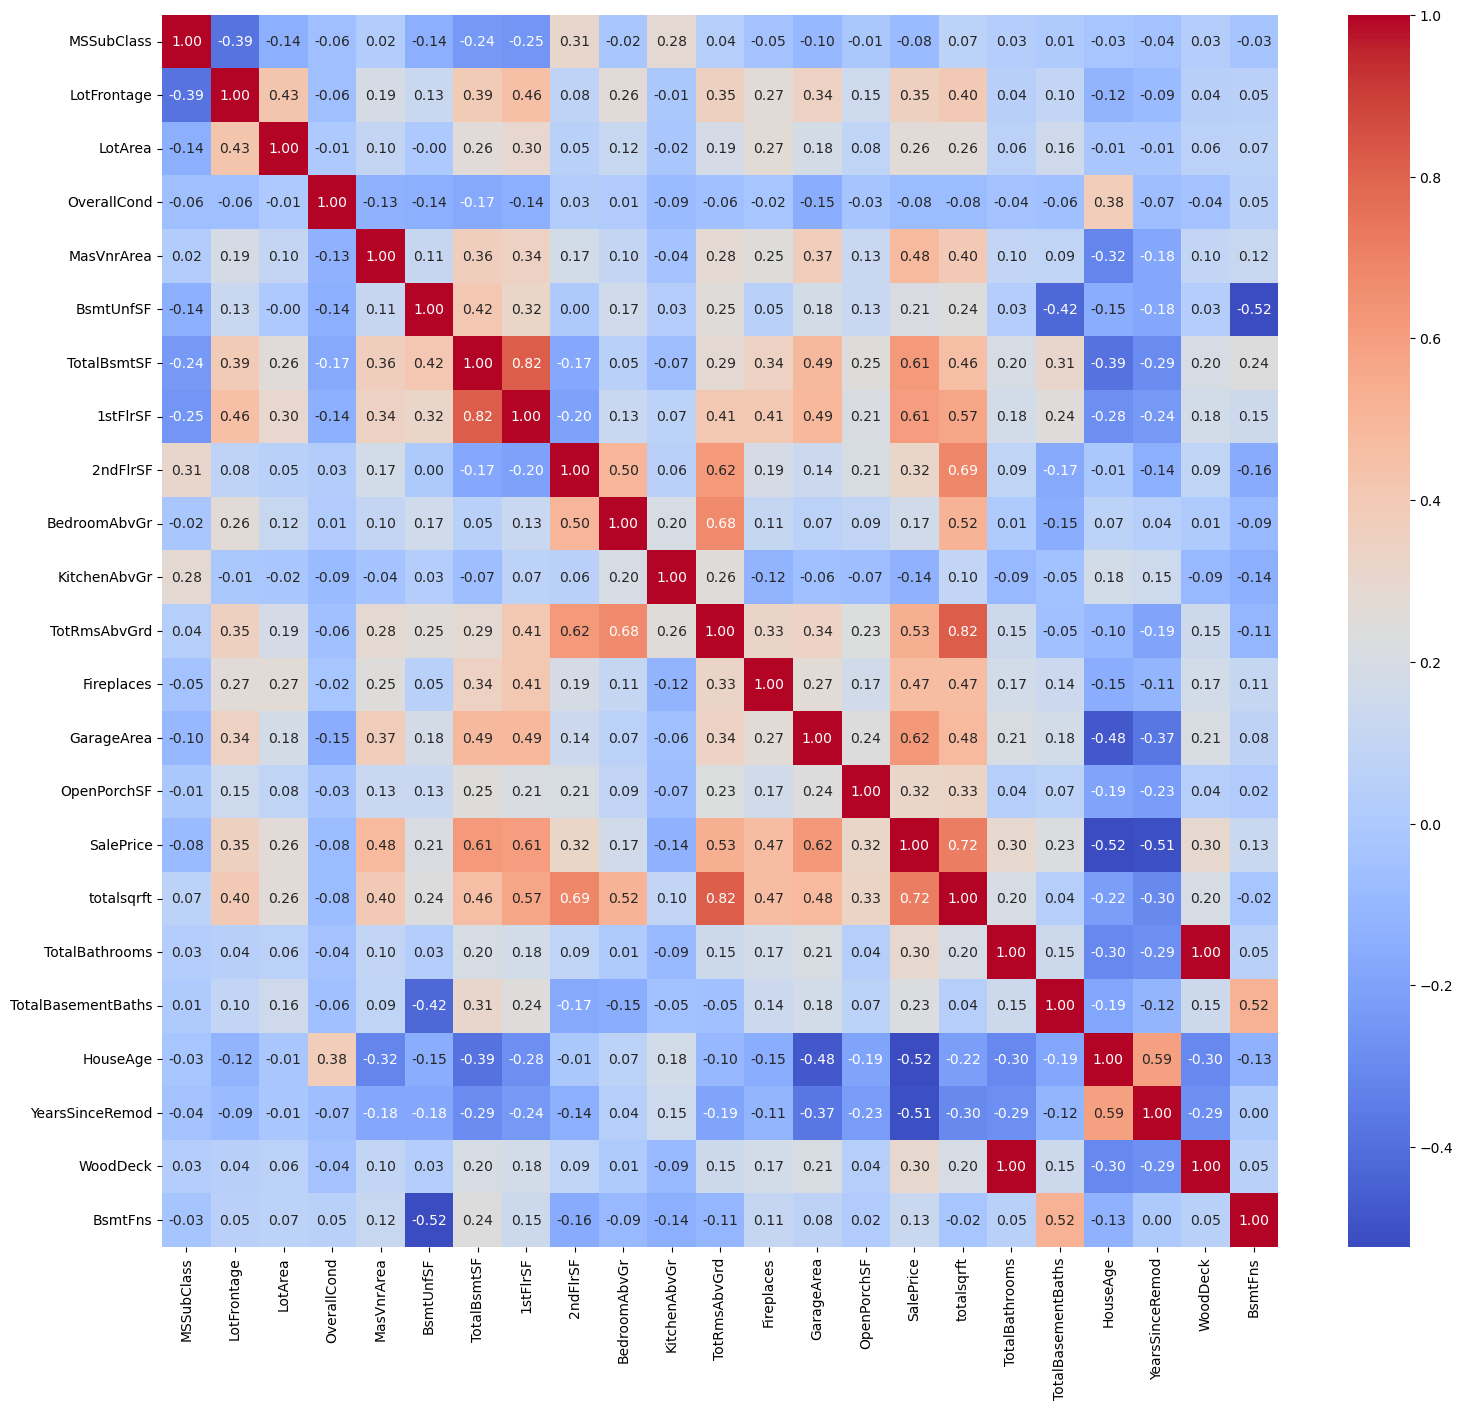

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(18, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

* Drope Those Column which have low Varience

In [88]:
df = df.drop(['GrLivArea', 'GarageCars','OverallQual'], axis=1)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1460 non-null   int64  
 1   LotFrontage         1201 non-null   float64
 2   LotArea             1460 non-null   int64  
 3   OverallCond         1460 non-null   int64  
 4   MasVnrArea          1452 non-null   float64
 5   BsmtUnfSF           1460 non-null   int64  
 6   TotalBsmtSF         1460 non-null   int64  
 7   1stFlrSF            1460 non-null   int64  
 8   2ndFlrSF            1460 non-null   int64  
 9   BedroomAbvGr        1460 non-null   int64  
 10  KitchenAbvGr        1460 non-null   int64  
 11  TotRmsAbvGrd        1460 non-null   int64  
 12  Fireplaces          1460 non-null   int64  
 13  GarageArea          1460 non-null   int64  
 14  OpenPorchSF         1460 non-null   int64  
 15  SalePrice           1460 non-null   int64  
 16  totals

In [112]:
df = df.drop(['1stFlrSF', '2ndFlrSF'],axis=1)

In [114]:
df.shape

(1460, 21)

In [120]:
df.isnull().sum()

MSSubClass            0
LotFrontage           0
LotArea               0
OverallCond           0
MasVnrArea            8
BsmtUnfSF             0
TotalBsmtSF           0
BedroomAbvGr          0
KitchenAbvGr          0
TotRmsAbvGrd          0
Fireplaces            0
GarageArea            0
OpenPorchSF           0
SalePrice             0
totalsqrft            0
TotalBathrooms        0
TotalBasementBaths    0
HouseAge              0
YearsSinceRemod       0
WoodDeck              0
BsmtFns               0
dtype: int64

In [118]:
df['LotFrontage'] = si.fit_transform(df[['LotFrontage']])

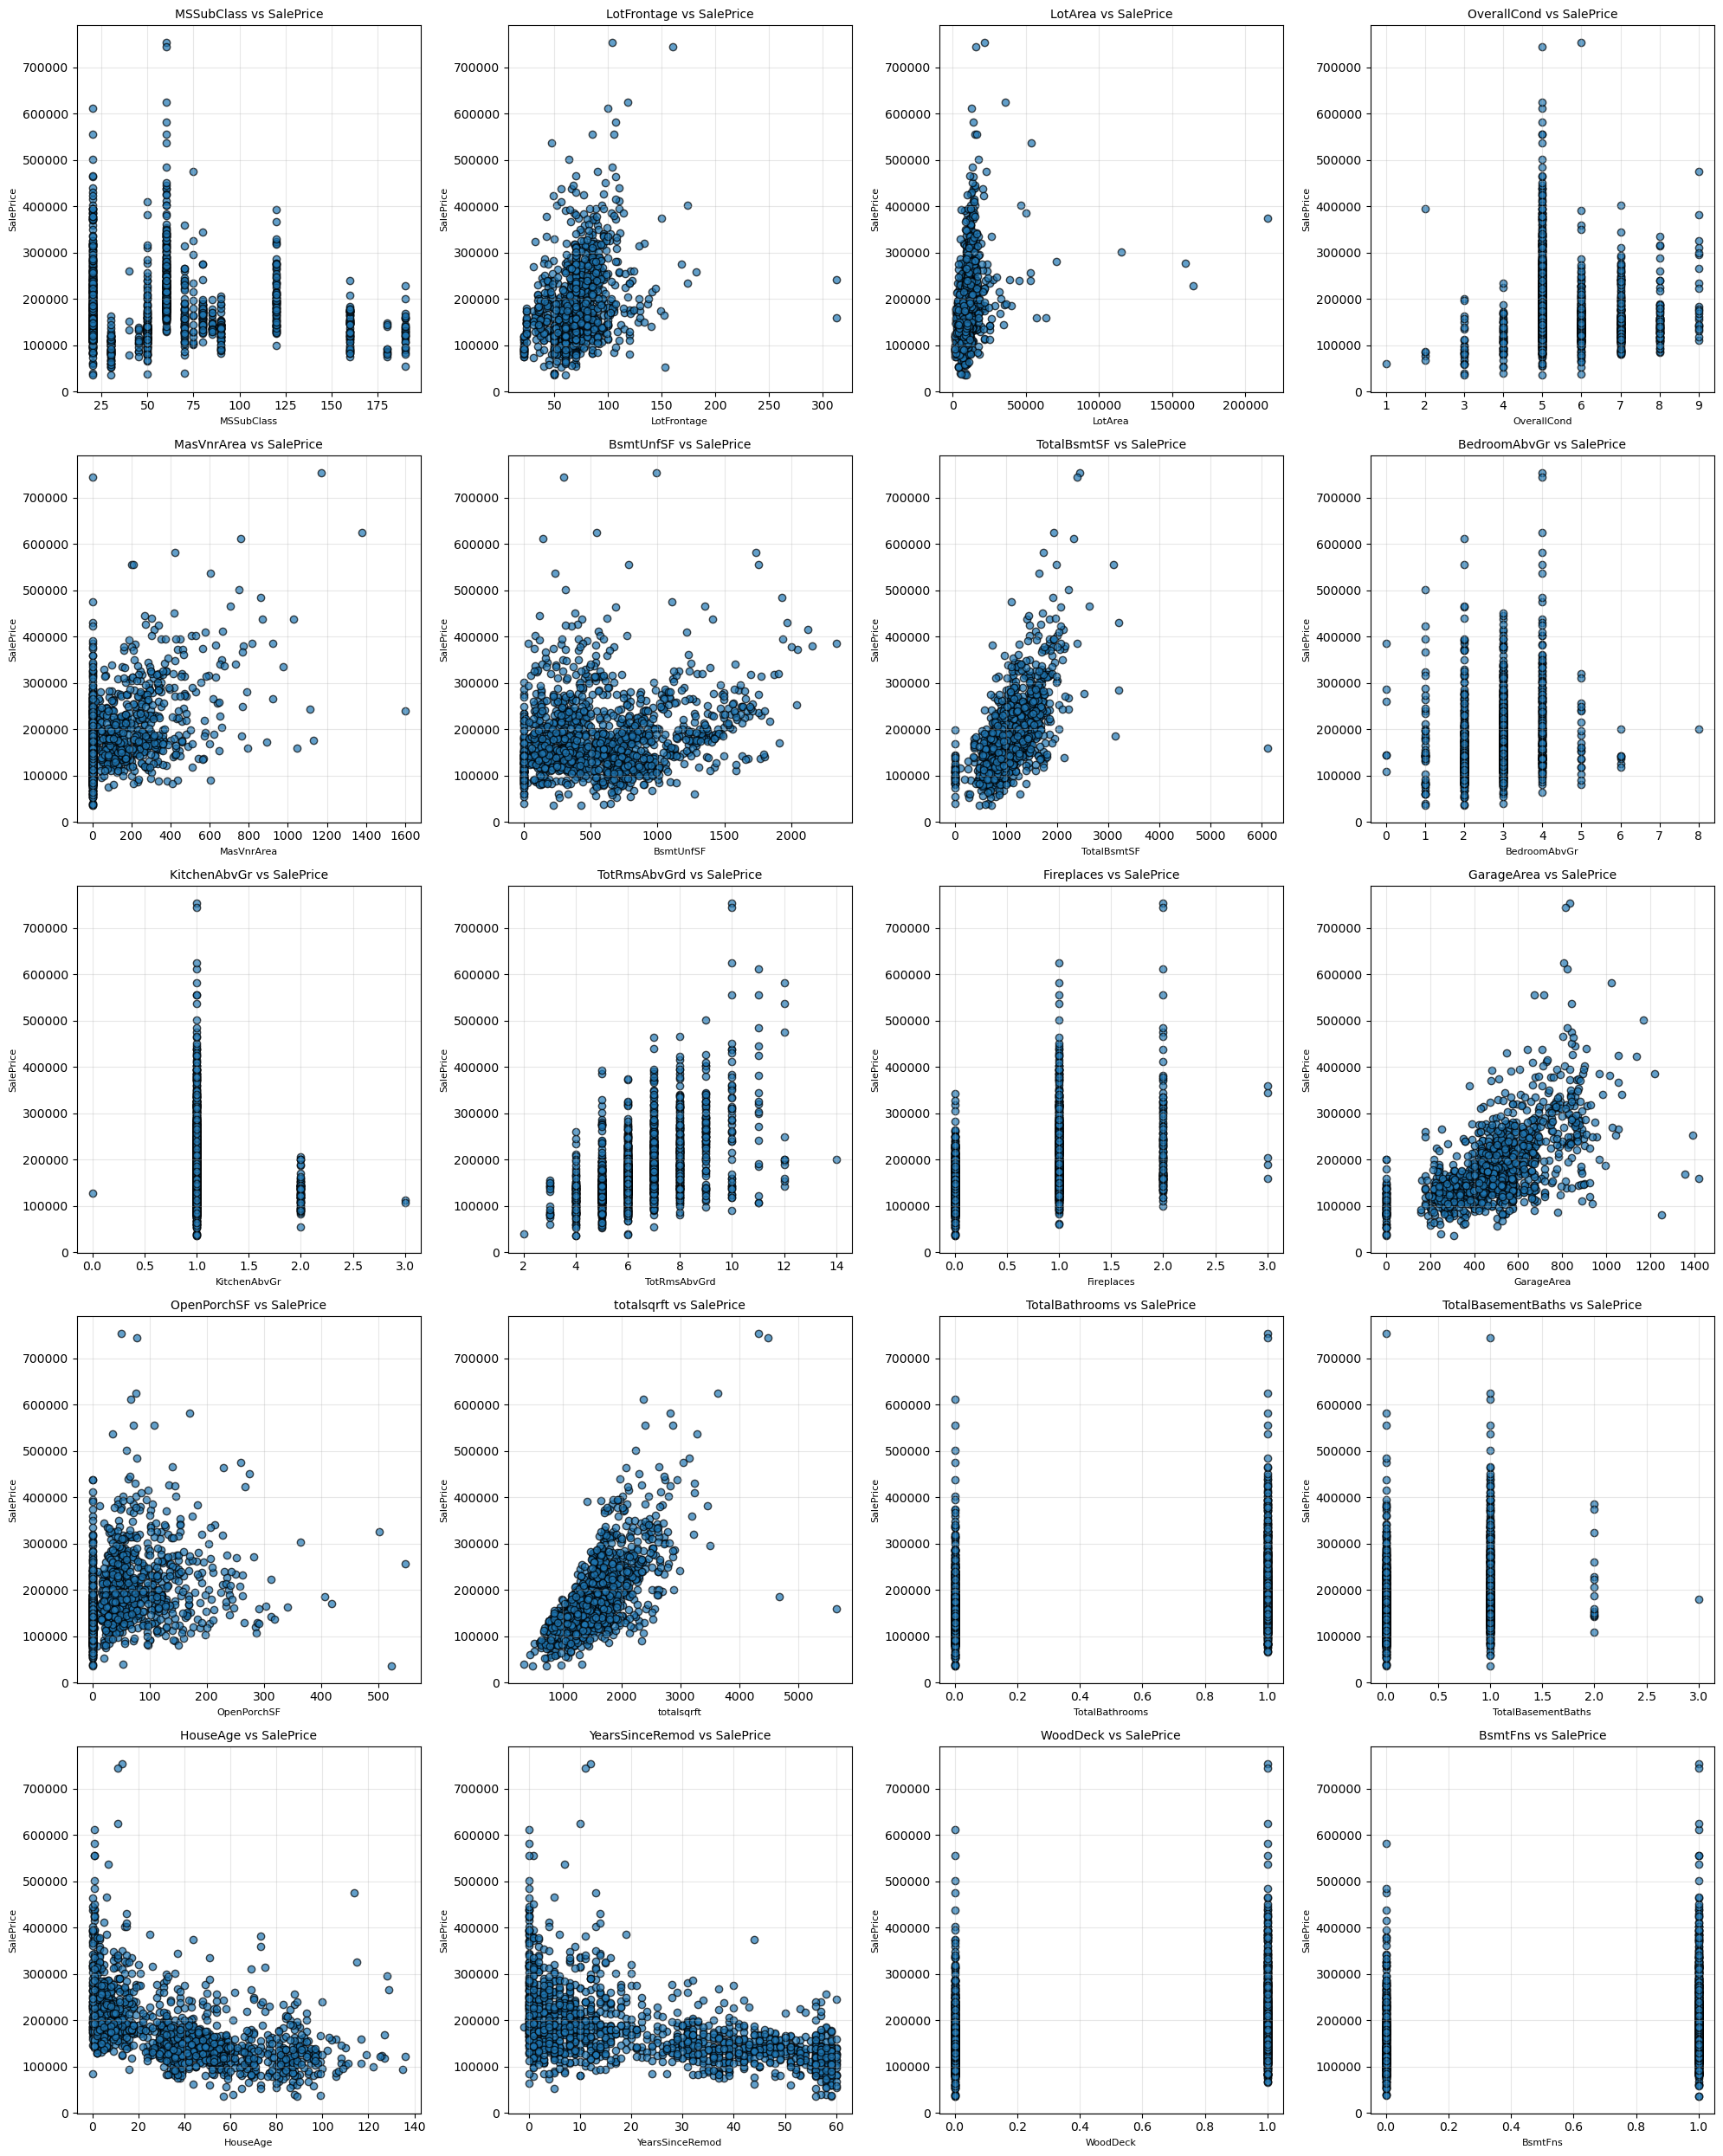

In [122]:
import math


feature_columns = [col for col in df.columns if col != 'SalePrice'] 
target_column = 'SalePrice' 


n_features = len(feature_columns)
cols = 4  # Number of columns in the grid
rows = math.ceil(n_features / cols)  # Calculate the number of rows


fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
axes = axes.flatten() 


for i, feature in enumerate(feature_columns):
    ax = axes[i]
    ax.scatter(df[feature], df[target_column], alpha=0.7, edgecolor='k')
    ax.set_title(f'{feature} vs {target_column}', fontsize=10)
    ax.set_xlabel(feature, fontsize=8)
    ax.set_ylabel(target_column, fontsize=8)
    ax.grid(alpha=0.3)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [124]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'BsmtUnfSF', 'TotalBsmtSF', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'OpenPorchSF', 'SalePrice',
       'totalsqrft', 'TotalBathrooms', 'TotalBasementBaths', 'HouseAge',
       'YearsSinceRemod', 'WoodDeck', 'BsmtFns'],
      dtype='object')

In [226]:
df['MasVnrArea'] = df['MasVnrArea'].apply(cat_w)

### Saclling For RFE

In [150]:
ss = StandardScaler()

In [228]:
dc = df.copy()

In [230]:
dc_s = dc[['LotFrontage', 'LotArea',
       'BsmtUnfSF', 'TotalBsmtSF','GarageArea', 'OpenPorchSF', 'totalsqrft','HouseAge',
       'YearsSinceRemod']]

In [232]:
dc[dc_s.columns] = ss.fit_transform(dc[dc_s.columns])

In [234]:
dc

,MSSubClass,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtUnfSF,TotalBsmtSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,...,GarageArea,OpenPorchSF,SalePrice,totalsqrft,TotalBathrooms,TotalBasementBaths,HouseAge,YearsSinceRemod,WoodDeck,BsmtFns
0,60,-0.229372,-0.207142,5,1,-0.944591,-0.459303,3,1,8,...,0.351000,0.216503,0.347273,0.384619,0,1,-1.043259,-0.869941,0,1
1,20,0.451936,-0.091886,8,0,-0.641228,0.466465,3,1,6,...,-0.060731,-0.704483,0.007288,-0.475290,1,0,-0.183465,0.390141,1,1
2,60,-0.093110,0.073480,5,1,-0.301643,-0.313369,3,1,6,...,0.631726,-0.070361,0.536154,0.530497,0,1,-0.977121,-0.821476,0,1
3,70,-0.456474,-0.096897,5,0,-0.061670,-0.687324,3,1,7,...,0.790804,-0.176048,-0.515281,0.398055,0,1,1.800676,0.632464,0,1
4,60,0.633618,0.375148,5,1,-0.174865,0.199680,4,1,9,...,1.698485,0.563760,0.869843,1.321306,1,1,-0.944052,-0.724547,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,-0.365633,-0.260560,5,0,0.873321,-0.238122,3,1,7,...,-0.060731,-0.100558,-0.074560,0.263694,0,0,-0.944052,-0.773012,0,0
1456,20,0.679039,0.266407,6,1,0.049262,1.104925,3,1,7,...,0.126420,-0.704483,0.366161,1.081376,1,1,-0.150396,-0.046041,1,1
1457,70,-0.183951,-0.147810,9,0,0.701265,0.215641,4,1,9,...,-1.033914,0.201405,1.077611,1.593867,0,0,1.073157,-0.918406,0,1
1458,20,-0.093110,-0.080160,6,0,-1.284176,0.046905,2,1,5,...,-1.090059,-0.704483,-0.488523,-0.828468,1,1,0.775536,-0.433759,1,1


In [650]:
ss_tar = StandardScaler()

In [652]:
y_train['SalePrice'] = ss_tar(train['SalePrice'])

TypeError: 'StandardScaler' object is not callable

## RFE -- For Feature Selection

In [191]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [236]:
X = dc.drop(['SalePrice'], axis=1)
y = dc['SalePrice']

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=50, random_state=42 )

rfe = RFE(estimator=rf, n_features_to_select=15)

rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(n_estimators=50, random_state=42),
    n_features_to_select=15)

In [344]:
X_train_rfe = rfe.transform(X_train)

In [346]:
X_train_rfe.shape

(1168, 15)

In [348]:
X_train.columns[rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'BsmtUnfSF',
       'TotalBsmtSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageArea', 'OpenPorchSF', 'totalsqrft', 'TotalBasementBaths',
       'HouseAge', 'YearsSinceRemod'],
      dtype='object')

# Using This 15 Columns

In [350]:
bf = dc[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'BsmtUnfSF',
       'TotalBsmtSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageArea', 'OpenPorchSF', 'totalsqrft', 'TotalBasementBaths',
       'HouseAge', 'YearsSinceRemod']]

In [354]:
bf['MSSubClass'] = ss.fit_transform(bf[['MSSubClass']]) 

In [356]:
bf.head()

,MSSubClass,LotFrontage,LotArea,OverallCond,BsmtUnfSF,TotalBsmtSF,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,OpenPorchSF,totalsqrft,TotalBasementBaths,HouseAge,YearsSinceRemod
0,0.073375,-0.229372,-0.207142,5,-0.944591,-0.459303,3,8,0,0.351000,0.216503,0.384619,1,-1.043259,-0.869941
1,-0.872563,0.451936,-0.091886,8,-0.641228,0.466465,3,6,1,-0.060731,-0.704483,-0.475290,0,-0.183465,0.390141
2,0.073375,-0.093110,0.073480,5,-0.301643,-0.313369,3,6,1,0.631726,-0.070361,0.530497,1,-0.977121,-0.821476
3,0.309859,-0.456474,-0.096897,5,-0.061670,-0.687324,3,7,1,0.790804,-0.176048,0.398055,1,1.800676,0.632464
4,0.073375,0.633618,0.375148,5,-0.174865,0.199680,4,9,1,1.698485,0.563760,1.321306,1,-0.944052,-0.724547


# Model Selection

In [216]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [739]:
X_train, X_test, y_train, y_test = train_test_split(bf, train['SalePrice'], test_size=0.2, random_state=42)

In [360]:
models = {
    'gb' : GradientBoostingRegressor(random_state=42),
    'rf' : RandomForestRegressor(random_state=42),
    'lr' : LinearRegression(),
    'sg' : SGDRegressor(random_state=42),
    'xg' : XGBRegressor(random_state=42)
}

In [741]:
result=[]

for name,model in models.items():
    
    model.fit(X_train, y_train)

    yp = model.predict(X_test)
    r2 = r2_score(yp,y_test)
    mse = mean_squared_error(yp, y_test)

    result.append({
        'Model':name,
        'r2': r2,
        'mse': mse
    })

In [743]:
result

[{'Model': 'gb', 'r2': 0.8726063645922837, 'mse': 778141879.2184443},
 {'Model': 'rf', 'r2': 0.8443538001518722, 'mse': 864443107.8951502},
 {'Model': 'lr', 'r2': 0.6477620493692072, 'mse': 1651222514.496199},
 {'Model': 'sg', 'r2': 0.5332675990346551, 'mse': 1993896699.9526834},
 {'Model': 'xg', 'r2': 0.8419510126113892, 'mse': 965492683.1538577}]

# HyperParameter Tuning

In [367]:
from sklearn.model_selection import RandomizedSearchCV

In [411]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],          # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],      # Step size shrinkage
    'max_depth': [3, 4, 5, 6, 7],                 # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10, 20],          # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 10],            # Minimum samples required in a leaf node
    'subsample': [0.6, 0.8, 1.0],                 # Fraction of samples used for fitting each tree
    'max_features': ['auto', 'sqrt', 'log2', None]# Number of features to consider for best split
}

In [413]:
gb = GradientBoostingRegressor(random_state=42)

In [415]:
rcv = RandomizedSearchCV(
    estimator= gb,
    param_distributions=prm,
    n_iter=100,
    n_jobs=-1,
    random_state=42,
    scoring= 'r2',
    cv = 5
)

In [417]:
rcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [50, 100, 150],
                                        'subsample': [0.7, 0.9, 1]},
                   random_state=42, scoring='r2')

In [429]:
rcv.best_score_

0.8322257389811305

In [431]:
rcv.best_params_

{'subsample': 0.9, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1}

# Model Training on Best Parameter

In [390]:
gb = GradientBoostingRegressor(random_state=42, subsample=0.9, n_estimators=150, max_depth=5, learning_rate=0.1)

In [396]:
bf.shape

(1460, 15)

In [398]:
y.shape

(1460,)

In [400]:
gb.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=150, random_state=42,
                          subsample=0.9)

In [402]:
yp = gb.predict(X_test)
r2 = r2_score(yp,y_test)
r2

0.8680821786093068

In [425]:
mse = mean_squared_error(yp,y_test)

In [427]:
mse

0.12691431889834592

# Train Model on Whole Data

In [730]:
gb.fit(bf,train['SalePrice'])

GradientBoostingRegressor(random_state=42)

* Now, testing Test Data

In [578]:
test = pd.read_csv('D:/test.csv')

In [580]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [582]:
test.shape

(1459, 80)

In [584]:
test['LotFrontage'] = si.fit_transform(test[['LotFrontage']])

In [586]:
test['totalsqrft'] = test['1stFlrSF'] + test['2ndFlrSF']

In [588]:
test['TotalBasementBaths'] = test['BsmtFullBath'] + (test['BsmtHalfBath'] * 0.5)

In [590]:
test['HouseAge'] = test['YrSold'] - test['YearBuilt']

In [592]:
test['YearsSinceRemod'] = test['YrSold'] - test['YearRemodAdd']

In [594]:
f_t = test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'BsmtUnfSF',
       'TotalBsmtSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageArea', 'OpenPorchSF', 'totalsqrft', 'TotalBasementBaths',
       'HouseAge', 'YearsSinceRemod']]

In [596]:
f_t.head()

,MSSubClass,LotFrontage,LotArea,OverallCond,BsmtUnfSF,TotalBsmtSF,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,OpenPorchSF,totalsqrft,TotalBasementBaths,HouseAge,YearsSinceRemod
0,20,80.0,11622,6,270.0,882.0,2,5,0,730.0,0,896,0.0,49,49
1,20,81.0,14267,6,406.0,1329.0,3,6,0,312.0,36,1329,0.0,52,52
2,60,74.0,13830,5,137.0,928.0,3,6,1,482.0,34,1629,0.0,13,12
3,60,78.0,9978,6,324.0,926.0,3,7,1,470.0,36,1604,0.0,12,12
4,120,43.0,5005,5,1017.0,1280.0,2,5,0,506.0,82,1280,0.0,18,18


In [598]:
t_s = f_t[['LotFrontage', 'LotArea',
       'BsmtUnfSF', 'TotalBsmtSF','GarageArea', 'OpenPorchSF', 'totalsqrft','HouseAge',
       'YearsSinceRemod', 'MSSubClass']]

In [624]:
f_t['BsmtUnfSF'] = si.fit_transform(f_t[['BsmtUnfSF']])

In [626]:
f_t['GarageArea'] = si.fit_transform(f_t[['GarageArea']])

In [628]:
f_t['TotalBsmtSF'] = si.fit_transform(f_t[['TotalBsmtSF']])

In [600]:
f_t[t_s.columns] = ss.fit_transform(f_t[t_s.columns])

In [602]:
f_t['TotalBasementBaths'] = f_t['TotalBasementBaths'].apply(cat_w)

In [604]:
f_t.head()

,MSSubClass,LotFrontage,LotArea,OverallCond,BsmtUnfSF,TotalBsmtSF,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,OpenPorchSF,totalsqrft,TotalBasementBaths,HouseAge,YearsSinceRemod
0,-0.874711,0.555587,0.363929,6,-0.650396,-0.370681,2,5,0,1.185538,-0.701628,-1.208835,0,0.413784,1.178391
1,-0.874711,0.604239,0.897861,6,-0.339262,0.638925,3,6,0,-0.740959,-0.178826,-0.316383,0,0.512398,1.320405
2,0.061351,0.263676,0.809646,5,-0.954667,-0.266785,3,6,1,0.042545,-0.207871,0.301945,0,-0.769577,-0.573119
3,0.061351,0.458284,0.032064,6,-0.526857,-0.271302,3,7,1,-0.012761,-0.178826,0.250418,0,-0.802448,-0.573119
4,1.465443,-1.244533,-0.971808,5,1.058554,0.528252,2,5,0,0.153157,0.489198,-0.417376,0,-0.605221,-0.289090


In [630]:
f_t.isnull().sum()

MSSubClass            0
LotFrontage           0
LotArea               0
OverallCond           0
BsmtUnfSF             0
TotalBsmtSF           0
BedroomAbvGr          0
TotRmsAbvGrd          0
Fireplaces            0
GarageArea            0
OpenPorchSF           0
totalsqrft            0
TotalBasementBaths    0
HouseAge              0
YearsSinceRemod       0
dtype: int64

In [732]:
predictions = gb.predict(f_t)

In [734]:
predictions

array([138984.13463621, 159661.87434467, 196137.72609148, ...,
       180339.73067784, 143538.48971836, 228364.54917486])

In [745]:
output = pd.DataFrame({'Id': test['Id'], 'PredictedPrice': predictions.flatten()})
output.to_csv('predicted_prices.csv', index=False)

print("Original predictions saved to 'predicted_prices.csv'")

Original predictions saved to 'predicted_prices.csv'
